In [148]:
import os

longitudonal_sequences_folder  = r'/Users/shefali/Dropbox/Research/HIVEpistatic/all_longitudinal_data'
filenames = [] 
for filename in os.listdir(longitudonal_sequences_folder ):
    if filename.endswith(".fasta"):
        file = os.path.join(longitudonal_sequences_folder, filename)
        filenames.append(file)
    else:
        continue
        
len(filenames) # to check number of files:  ls -1 [directory] | wc -l

1714

In [149]:
def getSequences(filename):
    sequences = []
    patient_info = []
    file = open(filename).read()
    lines = file.split("\n")
    for line in lines:
        if ">" in line:
            patient_info.append(line)
        elif line:  # check not empty
            line = line.replace("~", "N")
            sequences.append(line)
    return [patient_info, sequences]

# # usage
# info, seqs = getSequences(filenames[0]) 
    
# # Confirm correct parsing
# for i in range(len(info)):
#     print(info[i])
#     print(seqs[i])

In [150]:
# ! pip install biopython

In [151]:
from Bio.Seq import Seq

def amino_translate(sequence, filename):
    coding_dna = Seq(sequence)
    protien_sequence = coding_dna.translate(stop_symbol="@") #set to_stop=True to translate until reaching stop codon
    if "@" in protien_sequence:
        print("FOUND STOP CODON IN FILE: ", filename, "SEQUENCE: ", str(protien_sequence), "\n\n")
    return protien_sequence

In [152]:
# write back to new file with protien sequence 
import sys
import Bio.Data.CodonTable as table

def nucleotide_to_amino_file(filename, outputDir):
    
    info, seqs = getSequences(filename)

    if len(info) != len(seqs):
        print("parsing error")
        print(info, seqs)
    
    path_to_file = os.path.splitext(filename)[0]
    simple_filename = path_to_file.split("/")[-1]
    
    out = open(outputDir + "/" + simple_filename + "_amino.fasta", "w")

    current = 0
    
    try:
        for i in range(len(info)):
            current = i
            out.write(info[i])
            out.write("\n")
            amino_seq = str(amino_translate(seqs[i], filename))
            out.write(amino_seq)
            out.write("\n")
        out.close()
    except table.TranslationError as err:
        print("error on: ", err, filename, seqs[current], "\n\n\n")

for filename in filenames:
    nucleotide_to_amino_file(filename, '/Users/shefali/Dropbox/Research/HIVEpistatic/protien_sequences')

FOUND STOP CODON IN FILE:  /Users/shefali/Dropbox/Research/HIVEpistatic/all_longitudinal_data/968_12446.fasta SEQUENCE:  GPKVK@WPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDENFRKYTAFTIPSINNETPGVRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIEQHRTKIEELRAHLLKWGFTTPDKKHQKEPPFLWM 


FOUND STOP CODON IN FILE:  /Users/shefali/Dropbox/Research/HIVEpistatic/all_longitudinal_data/838_7048.fasta SEQUENCE:  KEKIEALTAICQEMEQEGKISKIGPENPYNTPIFAIKKKDSTKWRKLVDFKELNKRTQDF@EVQLGIPHPEGLKQKRSVTVLDVGDAYFSCPLDPDFRKYAAFTIPSVNSETPGVRYQYNVLPQGWTGSPAIFQSSMTKILDPFRKDNPELEICQYVDDLYVGSDLPLAEHRKRVASLREHLYQWGFYTPDK 


FOUND STOP CODON IN FILE:  /Users/shefali/Dropbox/Research/HIVEpistatic/all_longitudinal_data/1241_26182.fasta SEQUENCE:  PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKRKKSVTVLDVGDAYFSVPLDKDFRKYTAFTIPSINNETPGVRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKANPDIDIYQYMDDLYVGSDLEIGQHRTKVEELRQHLLRWGFTTPDKKHQKE

# Sequence Alignment

In [153]:
! pwd

/Users/shefali/Dropbox/Research


In [154]:
! cat HIVEpistatic/protien_sequences/* > HIVEpistatic/all_protien_sequences.fasta


In [156]:
! linsi HIVEpistatic/all_protien_sequences.fasta > HIVEpistatic/aligned_protien_sequences.fasta

outputhat23=16
treein = 0
compacttree = 0
stacksize: 8192 kb
rescale = 1
All-to-all alignment.
tbfast-pair (aa) Version 7.453
alg=L, model=BLOSUM62, 2.00, -0.10, +0.10, noshift, amax=0.0
0 thread(s)

outputhat23=16
Loading 'hat3.seed' ... 
done.
Writing hat3 for iterative refinement
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00
tbutree = 1, compacttree = 0
Constructing a UPGMA tree ... 
 4010 / 4017
done.

Progressive alignment ... 
STEP  4001 /4016 
done.
tbfast (aa) Version 7.453
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
1 thread(s)

minimumweight = 0.000010
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 16
sueff_global = 0.100000
nadd = 16
Loading 'hat3' ... done.
rescale = 1

 4010 / 4017
Segment   1/  1    1- 561
STEP 001-294-0  identical.    identical.    identical.    identical.    identical.    identical.    identical.    identical.    identical.    identical.    identical.    identical.    identical.    iden

# Post-alignment

In [182]:
# Rewritten to deal w/ \n characters in sequences introduced by linsi
def getAlignedSequences(filename):
    sequences = []
    patient_info = []
    file = open(filename).read()
    lines = file.split("\n")
    currSeq = ""
    for line in lines:
        if ">" in line:
            patient_info.append(line)
            if currSeq != "":
                sequences.append(currSeq)
            currSeq = ""
        elif line:  # check not empty
            line = line.replace("~", "N")
            currSeq = currSeq + line
    return [patient_info, sequences]

In [183]:
info, seqs = getAlignedSequences('/Users/shefali/Dropbox/Research/HIVEpistatic/aligned_protien_sequences.fasta')

In [184]:
patients = []
for inf in info:
    split = inf.split("_")
    patient = split[0] + split[1]
    if patient not in patients:
        patients.append(patient)
        
print("Total patients: ", len(patients)) # should be n - (# patients whos HIV included stop codons)
print("Total sequences: ", len(seqs))

Total patients:  1711
Total sequences:  4016


In [189]:
import pandas as pd
aligned_seqs = pd.DataFrame(list(zip(info, seqs)), columns =['Patient info', 'Sequence'])
aligned_seqs.to_csv('/Users/shefali/Dropbox/Research/HIVEpistatic/aligned_protien_sequences.csv')

# Load final dataset

In [117]:
import pandas as pd

aligned_seqs = pd.read_csv('/Users/shefali/Dropbox/Research/HIVEpistatic/aligned_protien_sequences.csv')

In [118]:
aligned_seqs = aligned_seqs.drop(columns='Unnamed: 0')
aligned_seqs.describe()

,Patient info,Sequence
count,4016,4016
unique,4016,3545
top,>1500_37091_06_PL270V2_C_2006_1__NVP_None,-----------LKPGMDGPKVKQWPLTEEKIKALTEICKEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKKKSVTVLDVGDAYFSVPLDENFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRIKNPEIVIYQYMDDLYVGSDLEIGQHRTKIEELRNHLLSWGFTTPDKKHQKEPPFLWMGYELHPDRWTVQPI----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
freq,1,120


In [119]:
byposition = aligned_seqs['Sequence'].apply(lambda x:pd.Series(list(x)[:230]))
byposition.describe()

,0,1,2,3,4,5,6,7,8,9,...,220,221,222,223,224,225,226,227,228,229
count,4016,4016,4016,4016,4016,4016,4016,4016,4016,4016,...,4016,4016,4016,4016,4016,4016,4016,4016,4016,4016
unique,2,6,5,7,5,11,6,8,5,4,...,5,3,7,6,5,3,6,8,4,4
top,-,-,-,-,-,-,-,-,-,-,...,H,Q,K,E,P,P,F,L,W,M
freq,2211,2209,2196,2196,2196,2196,2194,2194,2194,2194,...,3892,3941,3910,3907,3714,3753,3742,3697,3749,3726


In [ ]:
pos = 184 - 1
ref = reference[pos]
print("ref: ", ref)
unique = byposition[pos].unique()
print("unique: ", unique)
for aa in unique:
    print(f"From {ref} to {aa}: ", byposition[byposition[pos] == aa].count()[0])

ref:  M
unique:  ['M' 'X' 'V' '-' 'I']
From M to M:  3159
From M to X:  77
From M to V:  766
From M to -:  3
From M to I:  11


In [4]:
# # Uncomment this cell to exclude sequences which have dashes in the 0-230 range.

aligned_seqs = aligned_seqs[byposition[0] != '-']
aligned_seqs = aligned_seqs[byposition[229] != '-']
byposition = byposition[byposition[0] != '-']
byposition = byposition[byposition[229] != '-']
byposition.shape, aligned_seqs.shape

<ipython-input-4-1f0f6183f4b4>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  aligned_seqs = aligned_seqs[byposition[229] != '-']


((1676, 230), (1676, 2))

In [5]:
bycolumn = {}
i = 0
for col in byposition.columns:
    bycolumn[i] = byposition[col].str.contains('-').sum()
    i = i + 1
    
dashesbycol = pd.DataFrame(bycolumn, index = [0])
dashesbycol.head(100)
dashesbycol.to_csv('dashes_by_position.csv')

In [6]:
byrow = {}
i = 0
for seq in aligned_seqs.iterrows():
    byrow[i] = seq[1].Sequence.count('-')
    i = i + 1
    
dashesbyrow = pd.DataFrame(byrow, index = [0]).T
dashesbyrow.to_csv('dashes_by_row.csv')

In [7]:
onehot = pd.get_dummies(byposition)

In [8]:
aligned_seqs = aligned_seqs.join(onehot)
aligned_seqs

,Patient info,Sequence,0_P,1_I,1_L,1_N,1_V,1_X,2_C,2_R,...,227_H,227_L,227_P,227_Q,227_R,227_X,228_W,229_L,229_M,229_X
0,>1023_15110_380526cpre_B_1994_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,>1023_15110_380526c+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
2,>1023_15111_380587gpre_B_1994_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3,>1023_15111_380587g+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,>1023_15112_380626Lpre_B_1994_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,>903_9114_PW_UG471_A_1998_0__None,PISPIETVPVTLKPGMDGPRIKQWPLTEEKIKALTXICXZMEXEGK...,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3925,>903_9114_PW_UG471a_A_1998_1__3TC_D4T_None,PISPIETVPVKLKPGMDGPRIKQWPLTEEKIKALTEICKEMEDEGK...,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3926,>903_9116_PW_UG474_D_1998_0__None,PISTIETVPVKLKPGMDGPKVKQWPLTEEKIKALTEICXEMEKEGK...,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
3927,>903_9116_PW_UG474a_D_1998_1__D4T_DDI_None,PISTIETVPVKLKXGMDGPKVKQWPLTEEKIKALTEICTEMEKEGK...,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [9]:
train_metadata = aligned_seqs[['Patient info', 'Sequence']]
train_metadata.head()

,Patient info,Sequence
0,>1023_15110_380526cpre_B_1994_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...
1,>1023_15110_380526c+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...
2,>1023_15111_380587gpre_B_1994_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...
3,>1023_15111_380587g+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...
4,>1023_15112_380626Lpre_B_1994_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...


In [10]:
train_data = aligned_seqs.drop(columns=['Patient info', 'Sequence'])
train_data.head()

,0_P,1_I,1_L,1_N,1_V,1_X,2_C,2_R,2_S,2_X,...,227_H,227_L,227_P,227_Q,227_R,227_X,228_W,229_L,229_M,229_X
0,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
1,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
2,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
3,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
4,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0


In [11]:
# Drop columns with - 
cols_to_drop = [col for col in train_data.columns if "-" in col]
print(f"Dropping {len(cols_to_drop)} columns with dashes.")
train_data.drop(columns=cols_to_drop, inplace=True)
train_data.head()

Dropping 0 columns with dashes.


,0_P,1_I,1_L,1_N,1_V,1_X,2_C,2_R,2_S,2_X,...,227_H,227_L,227_P,227_Q,227_R,227_X,228_W,229_L,229_M,229_X
0,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
1,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
2,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
3,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
4,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0


In [12]:
train_data.shape

(1676, 929)

In [13]:
import re
import numpy as np
cocktails = set()
each_cocktail = []


for seq in train_metadata.iterrows():
    info = seq[1]['Patient info']
    drugs = info.split("__")[1]
    re_match = re.findall(r"(?P<drug>([A-Z0-9a-z)]+))", drugs)
    drug = [match[0] for match in re_match if match[0] != 'None' and match[0] != 'Unknown']
    cocktail = tuple(drug)
    each_cocktail.append(cocktail)
    cocktails.add(cocktail)
    
dic = {cocktail:i for i,cocktail in enumerate(cocktails)}
each_cocktail_number = [np.array(dic[cocktail]) for cocktail in each_cocktail]

In [14]:
train_metadata['Cocktail'] = each_cocktail
train_metadata['Cocktail_number'] = each_cocktail_number

<ipython-input-14-a2a6aab48ea8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_metadata['Cocktail'] = each_cocktail
<ipython-input-14-a2a6aab48ea8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_metadata['Cocktail_number'] = each_cocktail_number


In [15]:
train_metadata.head()

,Patient info,Sequence,Cocktail,Cocktail_number
0,>1023_15110_380526cpre_B_1994_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,(),60
1,>1023_15110_380526c+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(D4T,)",52
2,>1023_15111_380587gpre_B_1994_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,(),60
3,>1023_15111_380587g+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(D4T,)",52
4,>1023_15112_380626Lpre_B_1994_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,(),60


In [16]:
# reference_subregion --> protien sequence
# referenceGenome = open('/Users/macbook/Desktop/Proj6/HIVMutationSignatures/hiv_longitudinal/AlignedSequences/reference_subregion.txt', 'r')
reference = "PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKQKKSVTVLDVGDAYFSVPLDKDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQCSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGFTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYAGIKVRQLCKLLRGTKALTEVVPLTEEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGQGQWTYQIYQEPFKNLKTGKYARMKGAHTNDVKQLTEAVQKIATESIVIWGKTPKFKLPIQKETWEAWWTEYWQATWIPEWEFVNTPPLVKLWYQLEKEPIIGAETFYVDGAANRETKLGKAGYVTDRGRQKVVPLTDTTNQKTELQAIHLALQDSGLEVNIVTDSQYALGIIQAQPDKSESELVSQIIEQLIKKEKVYLAWVPAHKGIGGNEQVDKLVSAGIRKVL"

In [17]:
# representative_mutations = {'M41L': 'TAM',
#                             'D67N': 'TAM',
#                             'K70R': 'TAM',
#                             'L210W': 'TAM',
#                             'T215Y': 'TAM',
#                             'T215F': 'TAM',
#                             'K219Q': 'TAM',
#                             'K219E': 'TAM',
#                             'K103N': 'nnRTI',
#                             'K103S': 'nnRTI',
#                             'L100I': 'nnRTI',
#                             'K101P': 'nnRTI',
#                             'V106A': 'nnRTI',
#                             'V106M': 'nnRTI',
#                             'Y181C': 'nnRTI',
#                             'Y181I': 'nnRTI',
#                             'Y181V': 'nnRTI',
#                             'Y188L': 'nnRTI',
#                             'G190A': 'nnRTI',
#                             'M230L': 'nnRTI'
#                            }

representative_mutations = {'41': 'TAM',
                            '65': 'TAM',
                            '67': 'TAM',
                            '70': 'TAM',
                            '74': 'TAM',
                            '115': 'TAM',
                            '184': 'TAM',
                            '210': 'TAM',
                            '215': 'TAM',
                            '100': 'nnRTI',
                            '101': 'nnRTI',
                            '103': 'nnRTI',
                            '106': 'nnRTI',
                            '181': 'nnRTI',
                            '188': 'nnRTI',
                            '190': 'nnRTI',
                            '230': 'nnRTI',
                           }


def get_mutations(reference, sequence):
    mutations = []
    index = 0
    for i,j in zip(reference, sequence):
        index = index + 1
        if i != j and i != '-' and j != '-' and i != 'X' and j != 'X':
#             mutation = str(i) + str(index) + str(j)
            mutation = str(index)
            mutations.append(mutation)
    return mutations

def get_represented_drugs(reference, sequence):
    treated = []
    positions = []
    mutations = get_mutations(reference, sequence)
    for mutation in mutations:
            if mutation in representative_mutations:
                treated.append(representative_mutations[mutation])
                positions.append(mutation)
                
#     # Uncomment to see all mutations for this sequence
#     if not treated:
#         print(mutations)

#     print(positions)
    return treated, positions


all_representations = []
all_positions = []
for seq in train_metadata.iterrows():
    sequence = seq[1]['Sequence']
    represented, positions = get_represented_drugs(reference, sequence)
    if represented:
        max_rep = max(set(represented), key = represented.count) 
        all_representations.append(max_rep)
        all_positions.append(tuple(positions))
    else:
        all_representations.append('None')
        all_positions.append(tuple([]))
    
    

In [18]:
l_dic = {lab:i for i,lab in enumerate(set(all_representations))}
each_label_number = [l_dic[label] for label in all_representations]
l_dic, each_label_number[0:5]

({'nnRTI': 0, 'None': 1, 'TAM': 2}, [2, 1, 1, 1, 1])

In [19]:
# all_positions

In [20]:
all_representations = pd.DataFrame(all_representations)
each_label_number = pd.DataFrame(each_label_number)
train_metadata['Label'] = all_representations
train_metadata['Label_number'] = each_label_number
train_metadata['Positions mutated'] = all_positions

<ipython-input-20-7fc4c224f2f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_metadata['Label'] = all_representations
<ipython-input-20-7fc4c224f2f9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_metadata['Label_number'] = each_label_number
<ipython-input-20-7fc4c224f2f9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [21]:
dashes = []
for seq in train_metadata.iterrows():
    dashes.append(seq[1]['Sequence'].count("-"))
    
train_metadata['Dash count'] = dashes
train_metadata.head()

<ipython-input-21-a53b1f291886>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_metadata['Dash count'] = dashes


,Patient info,Sequence,Cocktail,Cocktail_number,Label,Label_number,Positions mutated,Dash count
0,>1023_15110_380526cpre_B_1994_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,(),60,TAM,2.0,"(215,)",0
1,>1023_15110_380526c+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(D4T,)",52,None,1.0,(),0
2,>1023_15111_380587gpre_B_1994_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,(),60,None,1.0,(),0
3,>1023_15111_380587g+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(D4T,)",52,None,1.0,(),0
4,>1023_15112_380626Lpre_B_1994_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,(),60,None,1.0,(),0


In [22]:
norm_train = train_data[train_metadata['Label'] != 'None']
norm_train
norm_metadata = train_metadata[train_metadata['Label'] != 'None']
norm_metadata

,Patient info,Sequence,Cocktail,Cocktail_number,Label,Label_number,Positions mutated,Dash count
0,>1023_15110_380526cpre_B_1994_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,(),60,TAM,2.0,"(215,)",0
11,>1023_15120_440113+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,"(D4T,)",52,TAM,2.0,"(210, 215)",0
15,>1023_15122_501907h+_B_1995_1__D4T_None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALXEICTELEKEGK...,"(D4T,)",52,TAM,2.0,"(41, 210, 215)",0
501,>1137_13426_SE185_7d_A_1998_1__NVP_None,PISPIETVPVTLKPGMDGPRXKQWPLTEEKIKALTEICKEMEKEGK...,"(NVP,)",26,nnRTI,0.0,(),226
572,>1167_14152_CA34264_B_2001_0__None,PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGK...,(),60,TAM,2.0,(),259
...,...,...,...,...,...,...,...,...
3924,>903_9114_PW_UG471_A_1998_0__None,PISPIETVPVTLKPGMDGPRIKQWPLTEEKIKALTXICXZMEXEGK...,(),60,NaN,NaN,(),160
3925,>903_9114_PW_UG471a_A_1998_1__3TC_D4T_None,PISPIETVPVKLKPGMDGPRIKQWPLTEEKIKALTEICKEMEDEGK...,"(3TC, D4T)",59,NaN,NaN,"(184,)",160
3926,>903_9116_PW_UG474_D_1998_0__None,PISTIETVPVKLKPGMDGPKVKQWPLTEEKIKALTEICXEMEKEGK...,(),60,NaN,NaN,(),160
3927,>903_9116_PW_UG474a_D_1998_1__D4T_DDI_None,PISTIETVPVKLKXGMDGPKVKQWPLTEEKIKALTEICTEMEKEGK...,"(D4T, DDI)",61,NaN,NaN,(),160


In [23]:
train_metadata[train_metadata['Label_number'] == 0].shape, train_metadata[train_metadata['Label_number'] == 1].shape, train_metadata[train_metadata['Label_number'] == 2].shape, train_metadata[train_metadata['Label_number'] == 3].shape

((165, 8), (666, 8), (91, 8), (0, 8))

In [24]:
train_data.head()

,0_P,1_I,1_L,1_N,1_V,1_X,2_C,2_R,2_S,2_X,...,227_H,227_L,227_P,227_Q,227_R,227_X,228_W,229_L,229_M,229_X
0,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
1,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
2,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
3,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
4,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0


# Clustering

Text(0.5, 1.0, 'Embedding of the training set by UMAP')

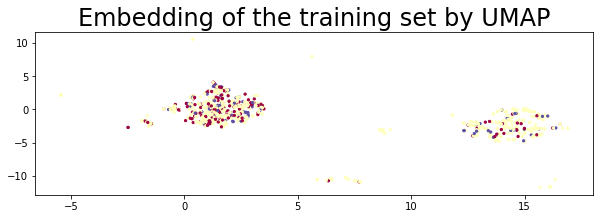

In [79]:
import umap
import matplotlib.pyplot as plt
colors = train_metadata['Label_number']
trans = umap.UMAP(n_neighbors=5, random_state=42).fit(train_data)  # norm_train
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=colors, cmap='Spectral')  # c=y_train
plt.title('Embedding of the training set by UMAP', fontsize=24)

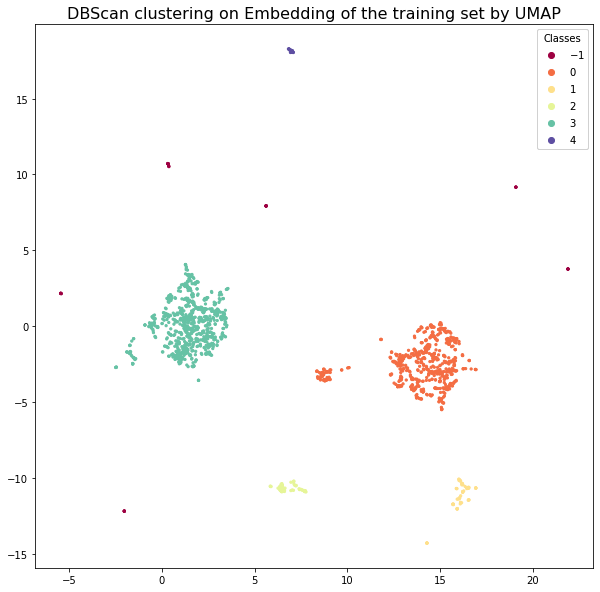


==============================Exploring cluster 0============================
REPRESENTATIVE POINT LOCATION:  [14.954776  -3.0285497]
Label:  None  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ('D4T',)
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ('D4T', 'DDI')
Label:  TAM  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  None  | Cluster:  0  | Rep. Mutation Positions:  ('74', '184')  | Cocktail:  ('3TC', 'ABC')
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ('D4T', 'DDI')
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ('3TC', 'ABC', 'AZT', 'EFV', 'FTC', 'TDF')
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  nan  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  None  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()

========

In [80]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=3, min_samples=20).fit(trans.embedding_)

plt.rcParams['figure.figsize'] = (10,10)
fig, ax = plt.subplots()
scatter = ax.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=clustering.labels_, cmap='Spectral')
legend1 = ax.legend(*scatter.legend_elements(num=len(set(clustering.labels_))), loc="best", title="Classes")
ax.add_artist(legend1)
# ax.set(facecolor = "black")
plt.title('DBScan clustering on Embedding of the training set by UMAP', fontsize=16);
plt.show()

plt.rcParams['figure.figsize'] = (10,3)

# pick some samples to decode
visitedClusters = []
num_show = 10
for core_index in clustering.core_sample_indices_:
    cluster = clustering.labels_[core_index]
    if cluster in visitedClusters or not train_metadata.iloc[core_index]['Cocktail']:   #norm_metadata
        continue
    visitedClusters.append(cluster)
    print(f"\n==============================Exploring cluster {cluster}============================")

    midpoint = trans.embedding_[core_index]

    # find closest points to midpoint
    points = np.array(trans.embedding_)
    distances = np.linalg.norm(points - np.array([midpoint]), axis=1)
    close_indices = np.argsort(distances)[0:num_show]
    closest = np.array([points[i] for i in close_indices])
    distances = sorted(distances)


#     scatter = plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=clustering.labels_, cmap='Spectral')
#     plt.title(f'DBScan clustering on Embedding of the training set by UMAP - Cluster {cluster}', fontsize=16);
#     plt.figure(figsize=(300,300))
#     plt.show()

    # print metadata for each close point
    print("REPRESENTATIVE POINT LOCATION: ", midpoint)
    for i in range(0,len(closest)): 
        row = train_metadata.iloc[close_indices[i]]   # #norm_metadata
        print("Label: ", row['Label'], " | Cluster: ", clustering.labels_[close_indices[i]], " | Rep. Mutation Positions: ", row['Positions mutated'],  " | Cocktail: ", row['Cocktail'])
        

In [81]:
seen = {}
for i in range(len(clustering.labels_)):
    cluster = clustering.labels_[i]
    if cluster not in seen:
        seen[cluster] = []
    seq = train_metadata.iloc[i]['Sequence']  # norm_metadata  
    seen[cluster].append((i, seq))

for cluster in seen.keys():
    print(f"Number of sequences in cluster {cluster}: {len(seen[cluster])}")

Number of sequences in cluster 0: 666
Number of sequences in cluster -1: 38
Number of sequences in cluster 1: 69
Number of sequences in cluster 2: 65
Number of sequences in cluster 3: 792
Number of sequences in cluster 4: 46


In [82]:
def get_cluster_mutation_distributions(clustering, metadata):
    cluster_mut_freqs = [{} for i in range(max(clustering.labels_)+1)] 
    cluster_med_freqs = [{} for i in range(max(clustering.labels_)+1)] 
    
    for mut in representative_mutations.keys():
        for clust in cluster_mut_freqs:
            clust[mut] = 0
    for i in range(len(clustering.labels_)):
        cluster = clustering.labels_[i]
        if cluster < 0:
            continue
            
        cocktail = np.array(metadata.iloc[i]['Cocktail'])  # # norm_metadata   
        for med in cocktail:
            if med in cluster_med_freqs[cluster]:
                cluster_med_freqs[cluster][med] += 1
            else:
                cluster_med_freqs[cluster][med] = 1
                
        seq = metadata.iloc[i]['Sequence']    # norm_metadata   
            
#         _, mutations = get_represented_drugs(reference, seq)
        mutations = get_mutations(reference, seq)
        for mutation in mutations:
            if mutation in cluster_mut_freqs[cluster]:
                cluster_mut_freqs[cluster][mutation] += 1
            else:
                cluster_mut_freqs[cluster][mutation] = 1
            
    return cluster_mut_freqs, cluster_med_freqs
        
    
import collections

def plot_cluster_mutation_distributions(clustering, metadata):
    cluster_mut_freqs, cluster_med_freqs = get_cluster_mutation_distributions(clustering, metadata)
    
    #Figure out which mutations to keep
    keep = []
    for mut_freqs in cluster_mut_freqs:
        max_value = max(mut_freqs.values())
        min_freq = int(0.3 * max_value) + 3
        for key in mut_freqs.keys():
            if mut_freqs[key] > min_freq:
                keep.append(key)
                
    # Set key to 0 for non-present mutations
    for mut_freqs in cluster_mut_freqs:
        for key in keep:
            if key not in mut_freqs:
                mut_freqs[key] = 0
                
                
    all_meds = [med for meds in cluster_med_freqs for med in meds.keys()]
    # Set key to 0 for non-present medications
    for med_freqs in cluster_med_freqs:
        for key in all_meds:
            if key not in med_freqs:
                med_freqs[key] = 0
            
    
    i = -1
    fig, ax = plt.subplots(len(cluster_mut_freqs), 2, figsize=(40,40))
    
    for mut_freqs, med_freqs in zip(cluster_mut_freqs, cluster_med_freqs):
        i += 1
        filter_over_5 = {k:v for k,v in mut_freqs.items() if k in keep and int(k) < 230} 
        number = {k:int(k) for k in mut_freqs.keys()}
        ks = sorted(filter_over_5, key=number.__getitem__)
        vals = [filter_over_5[k] for k in ks]

        plt.xticks(rotation='vertical')
        cluster = cluster_mut_freqs.index(mut_freqs)
        ax[i, 0].set_title(f"Frequency of mutations in cluster {cluster} with {len(seen[cluster])} sequences")
        ax[i, 0].bar(ks, vals, color='g')
        
        ks = sorted(med_freqs.keys())
        vals = [med_freqs[k] for k in ks]        
        ax[i, 1].set_title(f"Frequency of known prescribed medicines in cluster {cluster_mut_freqs.index(mut_freqs)}")
        ax[i, 1].bar(ks, vals, color='g')


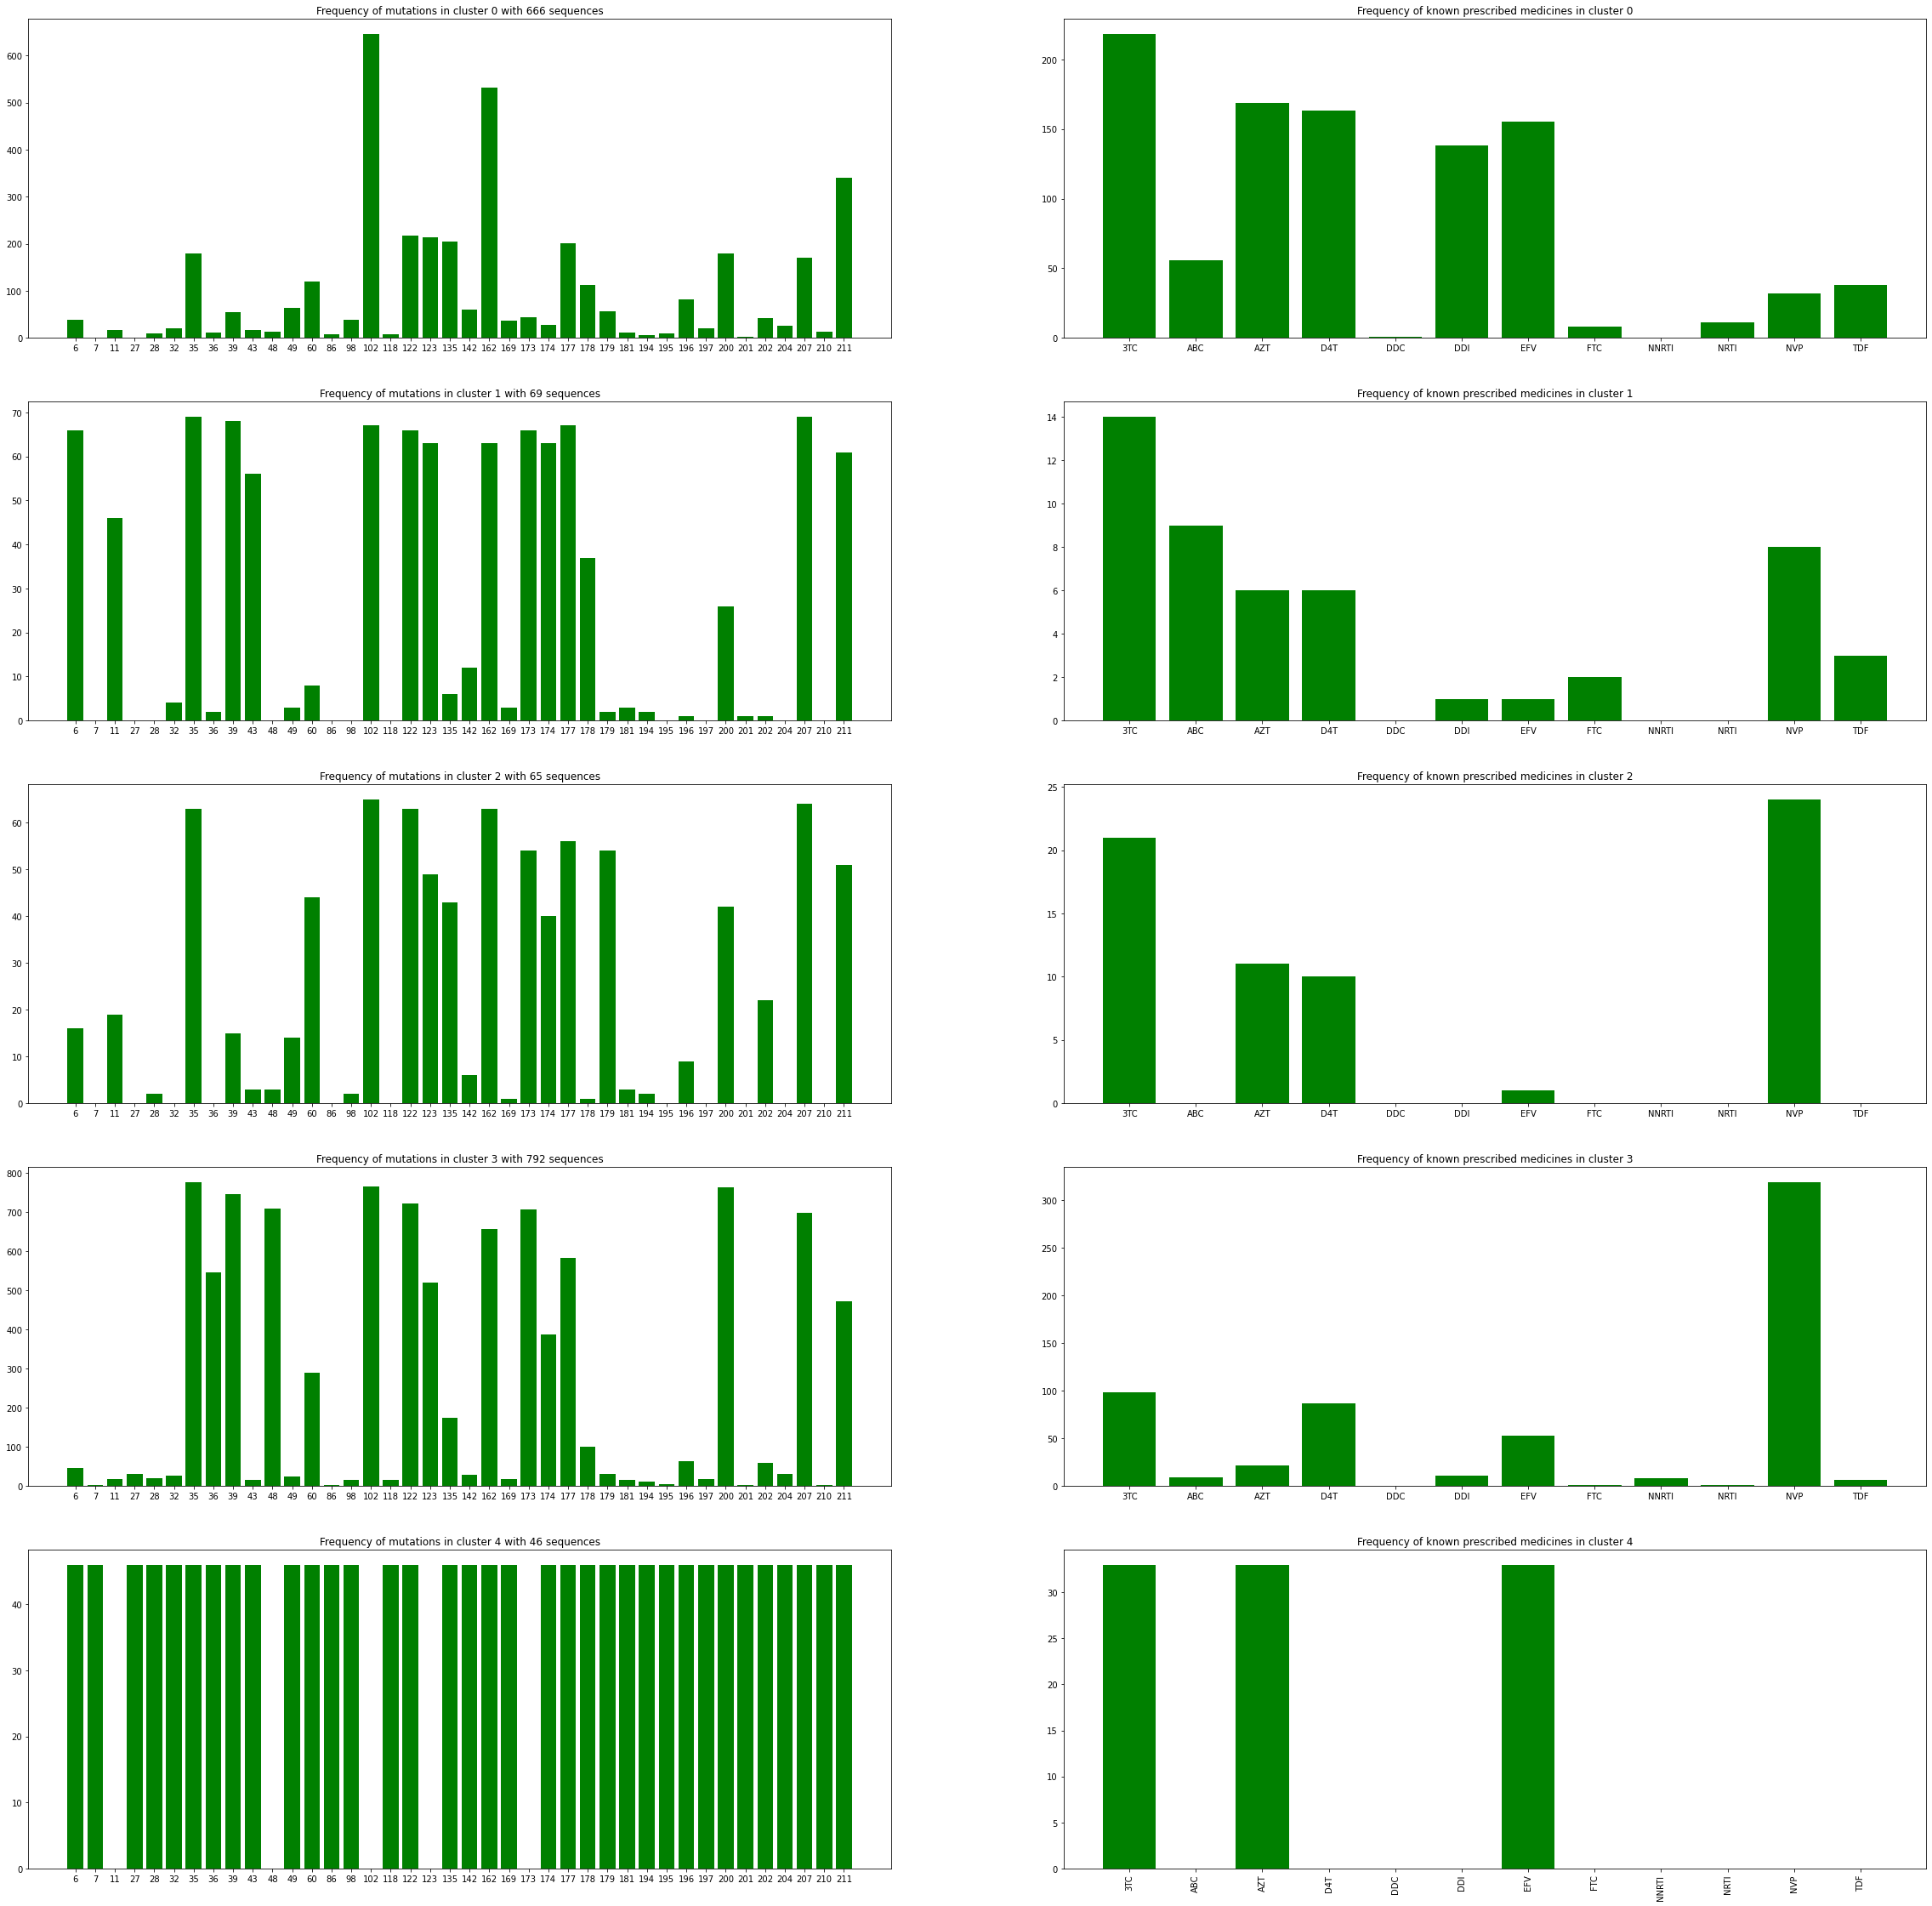

In [83]:
plot_cluster_mutation_distributions(clustering, train_metadata)
# get_cluster_mutation_distributions(clustering, train_metadata)[1]

In [84]:
def explore_cluster(cl_i, metadata):
    print("===========Representative sequence from each study in this cluster===============\n")
    info = []
    studies = set()
    patients = set()
    for i, seq in seen[cl_i]:
        all_mut = get_mutations(reference, seq)
        drugs, rep_mut = get_represented_drugs(reference, seq)
        non_rep_muts = sorted([int(mut) for mut in all_mut if mut not in rep_mut])
        cocktail = metadata.iloc[i]['Cocktail']  
        meta = metadata.iloc[i]['Patient info']  
        dash = metadata.iloc[i]['Dash count'] 
        
        study = re.split("_", meta)[0]
        patient = re.split("_", meta)[1]
        patients.add(patient)
        if study not in studies:
            studies.add(study)
#             print(metadata.iloc[i]['Sequence'], '\n')     # uncomment to view smaple sequence for each study
        
        info.append([meta, drugs, rep_mut, non_rep_muts, cocktail, dash])
    info = pd.DataFrame(info, columns=['Patient info', 'Rep. Mutation Type', 'Representative mutations', 'Other mutations', 'Cocktail', 'Dash count'])
    print(f"{len(studies)} different studies observed in this cluster", studies, "\n")
    print(f"{len(patients)} different patients observed in this cluster: ") #, patients, "\n")
    return info

info = explore_cluster(3, train_metadata)  # norm_metadata
pd.set_option('display.max_colwidth', None)
info.head() #clusters 4, 5, 8, 

===========Representative sequence from each study in this cluster===============

17 different studies observed in this cluster {'>1180', '>1908', '>903', '>1711', '>1730', '>2011', '>2031', '>1504', '>1500', '>1137', '>930', '>1951', '>1249', '>1573', '>1881', '>1939', '>1537'} 

387 different patients observed in this cluster: 


,Patient info,Rep. Mutation Type,Representative mutations,Other mutations,Cocktail,Dash count
0,>1137_13428_SE73p_C_1998_0__None,[nnRTI],[101],"[35, 36, 39, 40, 43, 48, 53, 102, 122, 138, 173, 177, 179, 196, 200, 207, 245, 272, 286, 291, 292, 293, 311, 334]",(),226
1,>1137_13428_SE73_7d_C_1998_1__NVP_None,[nnRTI],[101],"[35, 36, 39, 40, 43, 48, 53, 102, 122, 138, 162, 177, 179, 196, 200, 207, 245, 272, 286, 291, 292, 293, 311, 334]","(NVP,)",226
2,>1180_23977_16055_BL_C_2001_0__None,[],[],"[35, 36, 39, 48, 60, 102, 121, 122, 162, 166, 173, 174, 177, 200, 207, 211, 245, 272, 286, 292, 317]",(),226
3,>1180_23977_16055_1Y_C_2002_1__None,[],[],"[35, 36, 39, 48, 60, 102, 121, 122, 162, 166, 173, 174, 177, 200, 207, 211, 245, 272, 286, 292, 317]",(),226
4,>1180_23977_16055_2Y_C_2003_2__None,[],[],"[35, 36, 39, 48, 60, 102, 122, 162, 166, 173, 174, 177, 200, 207, 211, 245, 272, 286, 292, 317]",(),226


# Look deeper into large clusters

Text(0.5, 1.0, 'Embedding of the training set by UMAP')

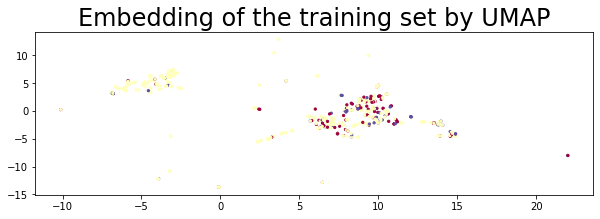

In [89]:
CLUSTER = 0

cluster1 = []
cluster1_metadata = []
indices = [index for (index, seq) in seen[CLUSTER]]
for ind in indices:
    cluster1_metadata.append(train_metadata.iloc[ind])  #norm_metadata
    cluster1.append(train_data.iloc[ind])  # norm_train

cluster1 = pd.DataFrame(cluster1)
cluster1_metadata = pd.DataFrame(cluster1_metadata)

colors = cluster1_metadata['Label_number']
trans = umap.UMAP(n_neighbors=3, min_dist=0.1, random_state=42).fit(cluster1)
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=colors, cmap='Spectral')  # c=y_train
plt.title('Embedding of the training set by UMAP', fontsize=24)


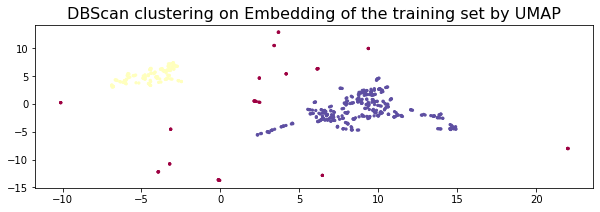

<Figure size 21600x21600 with 0 Axes>


==============================Exploring cluster 0============================
REPRESENTATIVE POINT LOCATION:  [-2.922773  7.066664]
Label:  None  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ('D4T',)
Label:  None  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  None  | Cluster:  0  | Rep. Mutation Positions:  ('67', '70', '184', '215')  | Cocktail:  ('3TC', 'ABC', 'AZT')
Label:  TAM  | Cluster:  0  | Rep. Mutation Positions:  ('215',)  | Cocktail:  ()
Label:  None  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  None  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  None  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  None  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  None  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()
Label:  None  | Cluster:  0  | Rep. Mutation Positions:  ()  | Cocktail:  ()

==============================Exploring cl

In [90]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=2, min_samples=15).fit(trans.embedding_)


plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, c=clustering.labels_, cmap='Spectral')
plt.title('DBScan clustering on Embedding of the training set by UMAP', fontsize=16);
plt.figure(figsize=(300,300))
plt.show()

# pick some samples to decode
visitedClusters = []
num_show = 10
for core_index in clustering.core_sample_indices_:
    cluster = clustering.labels_[core_index]
    if cluster in visitedClusters or not cluster1_metadata.iloc[core_index]['Cocktail']:
        continue
    visitedClusters.append(cluster)
    print(f"\n==============================Exploring cluster {cluster}============================")

    midpoint = trans.embedding_[core_index]

    # find closest points to midpoint
    points = np.array(trans.embedding_)
    distances = np.linalg.norm(points - np.array([midpoint]), axis=1)
    close_indices = np.argsort(distances)[0:num_show]
    closest = np.array([points[i] for i in close_indices])
    distances = sorted(distances)

    # print metadata for each close point
    print("REPRESENTATIVE POINT LOCATION: ", midpoint)
    for i in range(0,len(closest)): 
        row = cluster1_metadata.iloc[close_indices[i]]
        print("Label: ", row['Label'], " | Cluster: ", clustering.labels_[close_indices[i]], " | Rep. Mutation Positions: ", row['Positions mutated'],  " | Cocktail: ", row['Cocktail'])
        

In [91]:
seen = {}
for i in range(len(clustering.labels_)):
    cluster = clustering.labels_[i]
    if cluster not in seen:
        seen[cluster] = []
    seq = train_metadata.iloc[i]['Sequence']   
    seen[cluster].append((i, seq))


for cluster in sorted(seen.keys()):
    print(f"Number of sequences in cluster {cluster}: {len(seen[cluster])}")

new_clust = clustering

Number of sequences in cluster -1: 56
Number of sequences in cluster 0: 139
Number of sequences in cluster 1: 369


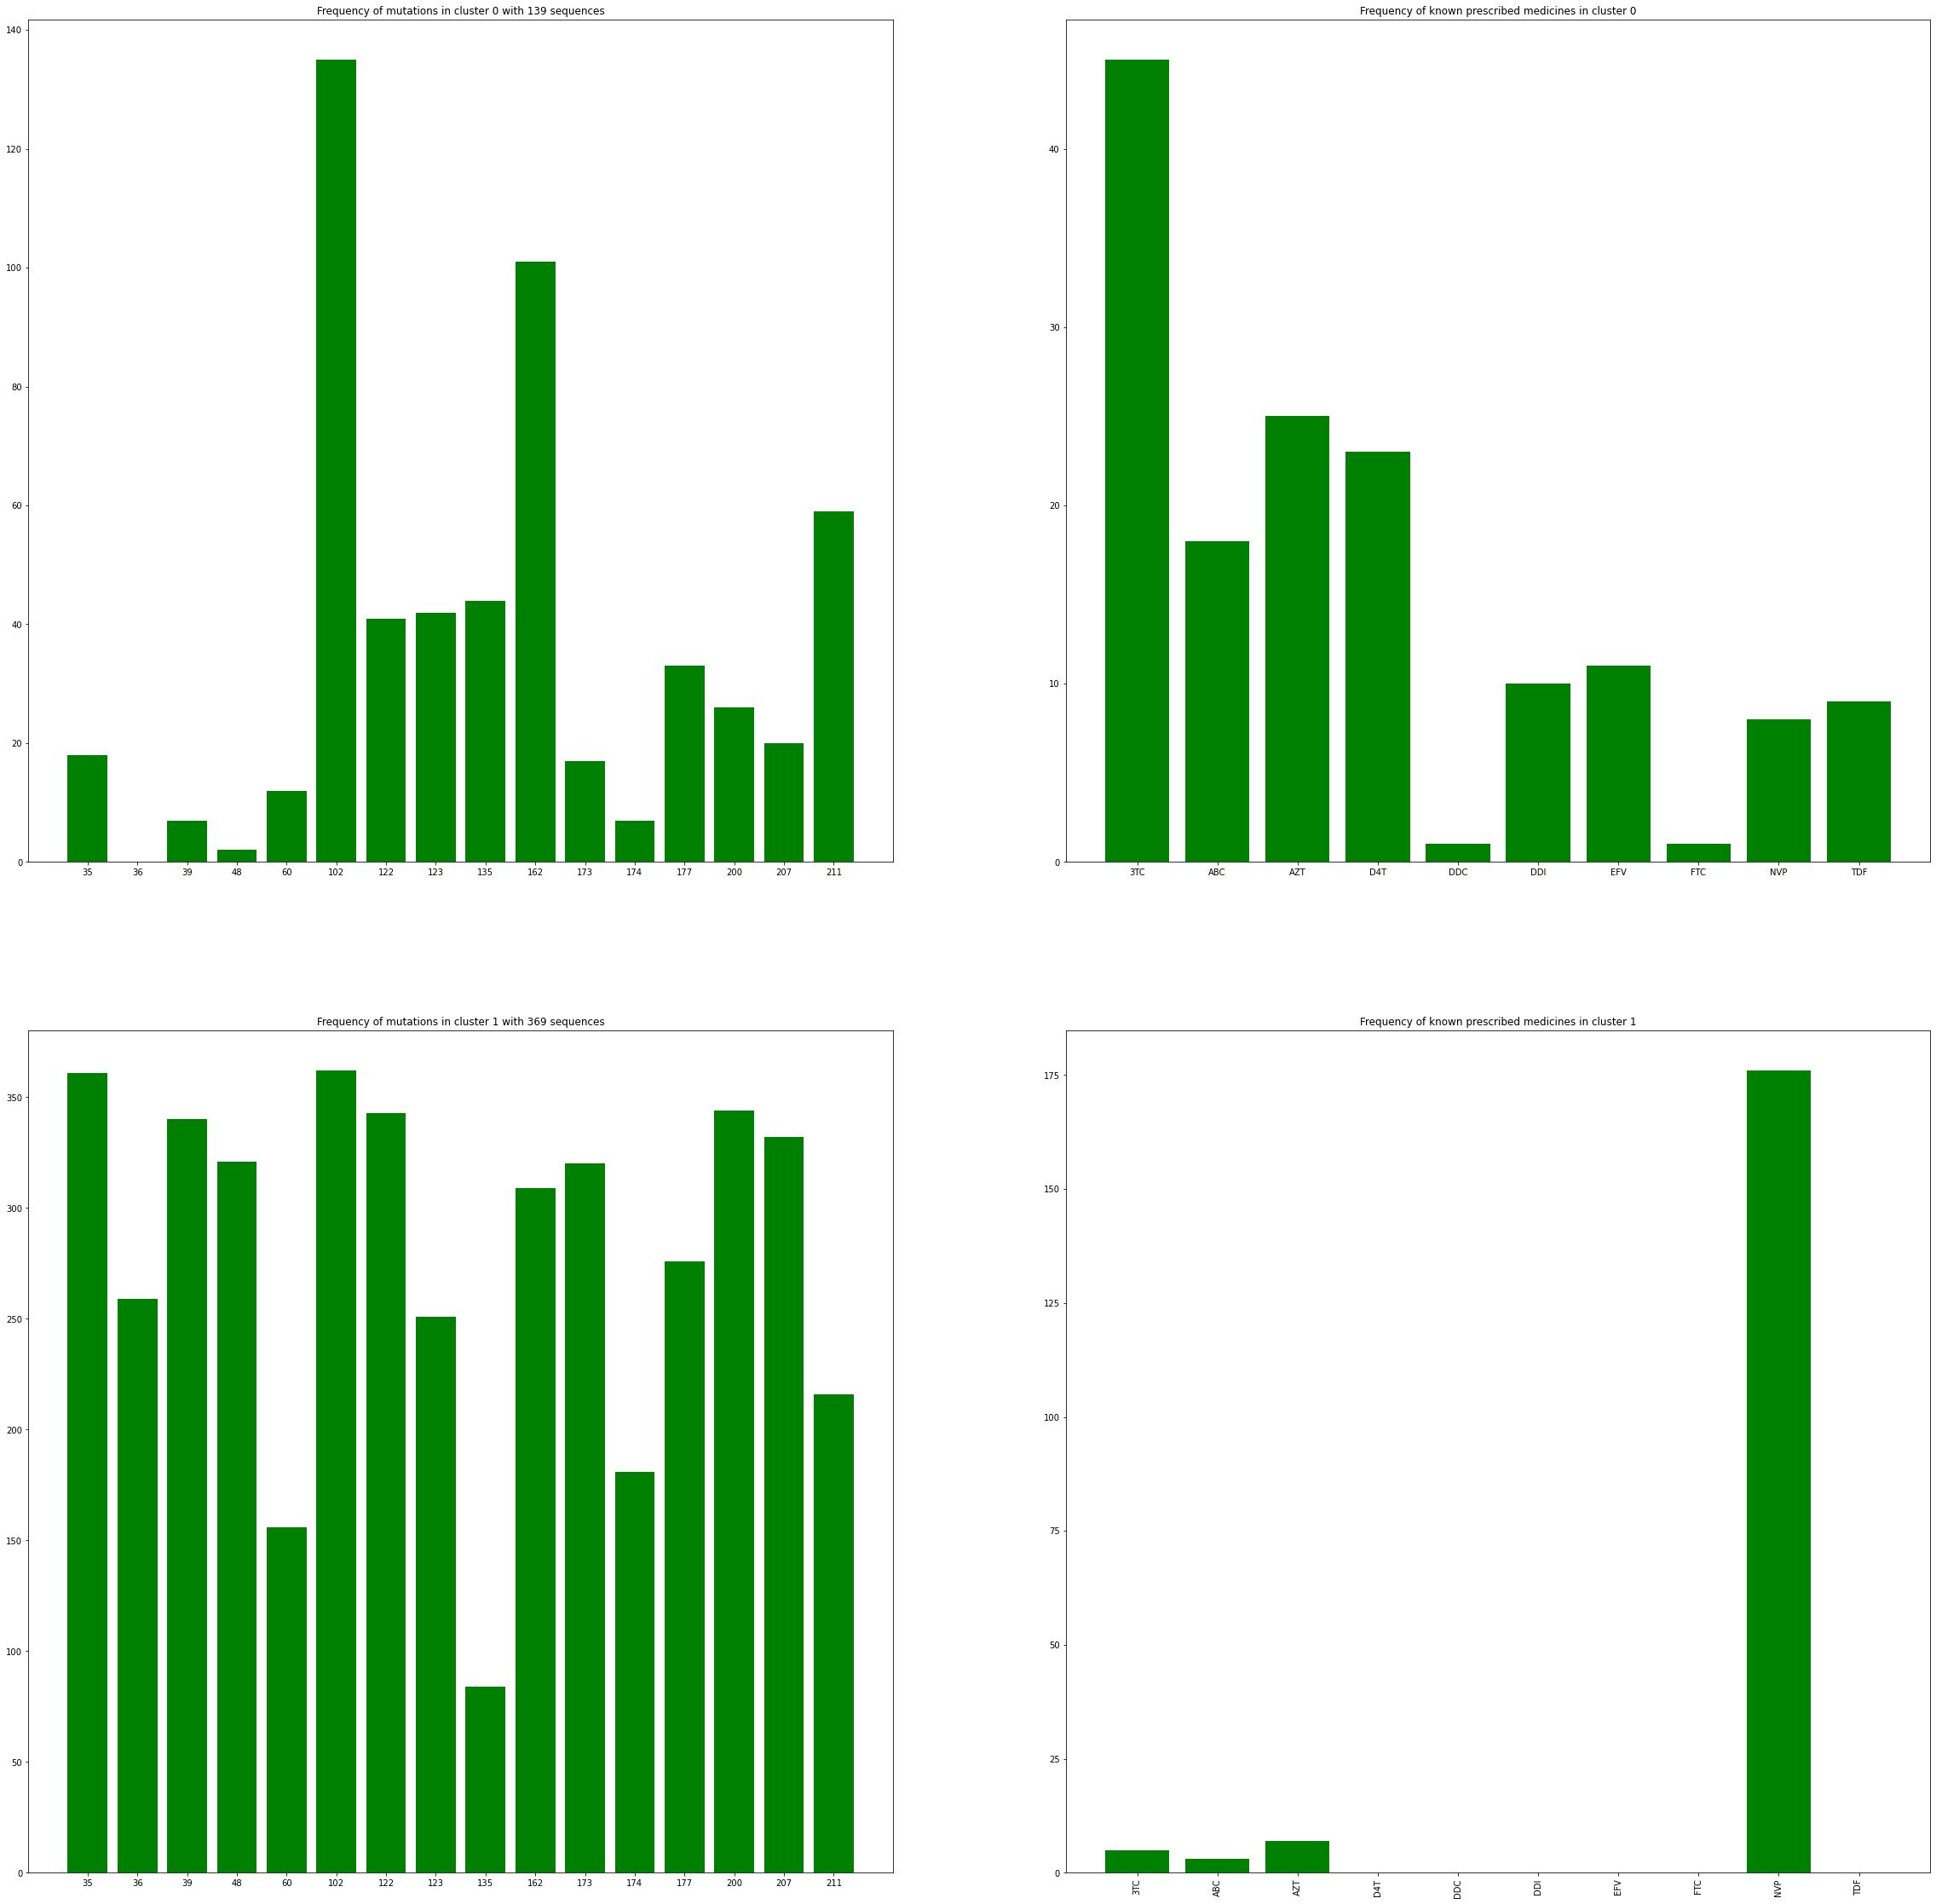

In [92]:
plot_cluster_mutation_distributions(clustering, cluster1_metadata)